In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys

In [2]:
dataset_path = "/home/q467565/Desktop/FLORA/code/social_gan/datasets/dataset/SDD/"

## Read the dataset and build a unique dataframe

In [3]:
# Read all scene annotations and store them in a unique dataframe 
# Each row will have this format: [scene_name, frameID, agentID, x, y, lost, occluded, interpolated, agent_type]
scenes_annotations_dataframe = pd.DataFrame(columns=["scene_name", "video_name", "frameID", "agentID", "x", "y", "lost", "occluded", "interpolated", "agent_type"],
                                            dtype=np.float64)

# Since the label is stored as a float number, we need this array to take their correspondent categorical value
agents_type = ["Biker", "Pedestrian", "Skater", "Cart", "Car", "Bus"]

for root, dirs, files in os.walk(dataset_path):
    if root != dataset_path:
        break;
    for scene_folder in dirs:
        scene_dataframe = pd.read_csv(root + scene_folder + "/" + scene_folder + "_originalSDD.txt", sep=' ', header=None, 
                                 names=["frameID", "agentID", "x", "y", "lost", "occluded", "interpolated", "agent_type"])
        scene_dataframe["scene_name"] = scene_folder.split("_")[0]
        scene_dataframe["video_name"] = scene_folder
        scenes_annotations_dataframe = scenes_annotations_dataframe.append(scene_dataframe)

/home/q467565/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [4]:
scenes_annotations_dataframe.head()

,agentID,agent_type,frameID,interpolated,lost,occluded,scene_name,video_name,x,y
0,0.0,0.0,10000.0,0.0,1.0,0.0,bookstore,bookstore_0,227.0,1055.0
1,0.0,0.0,10001.0,1.0,1.0,0.0,bookstore,bookstore_0,225.0,1055.0
2,0.0,0.0,10002.0,1.0,1.0,0.0,bookstore,bookstore_0,225.0,1055.0
3,0.0,0.0,10003.0,1.0,1.0,0.0,bookstore,bookstore_0,225.0,1055.0
4,0.0,0.0,10004.0,1.0,1.0,0.0,bookstore,bookstore_0,225.0,1055.0


## Overall statistics

In [6]:
videos = scenes_annotations_dataframe["video_name"].unique()
scenes = scenes_annotations_dataframe["scene_name"].unique()

print("Number of scenes: ", len(scenes))
print("Number of videos: ", len(videos))
print("Number of annotated frames: ", scenes_annotations_dataframe["frameID"].nunique())
print("Number of annotated agents: ", scenes_annotations_dataframe["agentID"].nunique())

Number of scenes:  8
Number of videos:  44
Number of annotated frames:  14558
Number of annotated agents:  1154


## Per-scene statistics

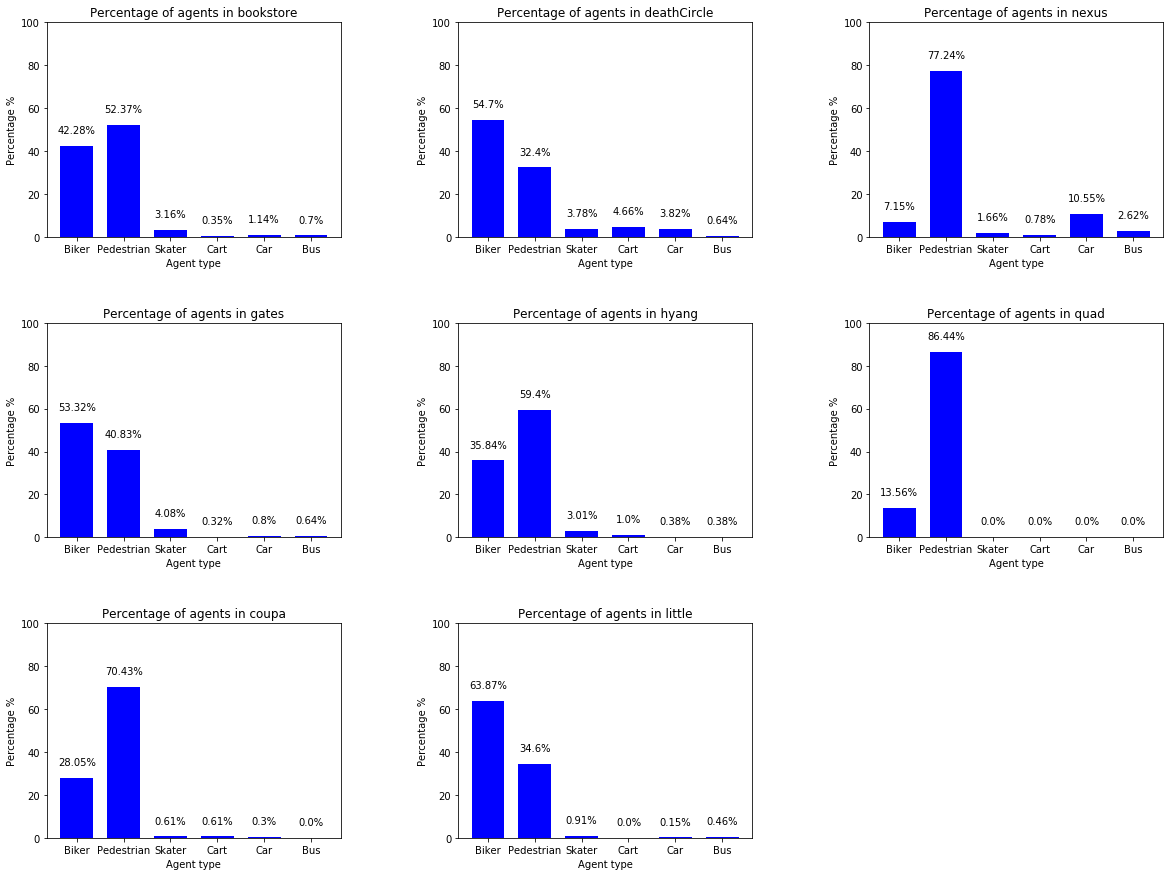

In [32]:
fig = plt.figure(figsize=(20,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, scene in enumerate(scenes):
    percentage_values = []
    
    for agent_idx, agent in enumerate(agents_type):
        scene_agents_count = scenes_annotations_dataframe[(scenes_annotations_dataframe["scene_name"] == scene) & 
                                                           (scenes_annotations_dataframe["agent_type"] == float(agent_idx))].groupby(["agentID", "video_name"]).ngroups
        scene_count = scenes_annotations_dataframe[scenes_annotations_dataframe['scene_name'] == scene].groupby(["agentID", "video_name"]).ngroups
        
        agent_percentage = (scene_agents_count / scene_count)*100.0
        percentage_values.append(agent_percentage)
    
    ax = fig.add_subplot(3, 3, i+1)
    bar1 = ax.bar(range(len(percentage_values)), percentage_values, 0.70, color="b", tick_label=agents_type)
    ax.set_ylabel("Percentage %")
    ax.set_xlabel('Agent type')
    ax.set_title('Percentage of agents in ' + scene)
    # Set a clean upper y-axis limit.
    ax.set_ylim(ymax=100)
    
    rects = ax.patches
    for rect, label in zip(rects, percentage_values):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + 5, str(round(label,2)) + "%", ha='center', va='bottom')

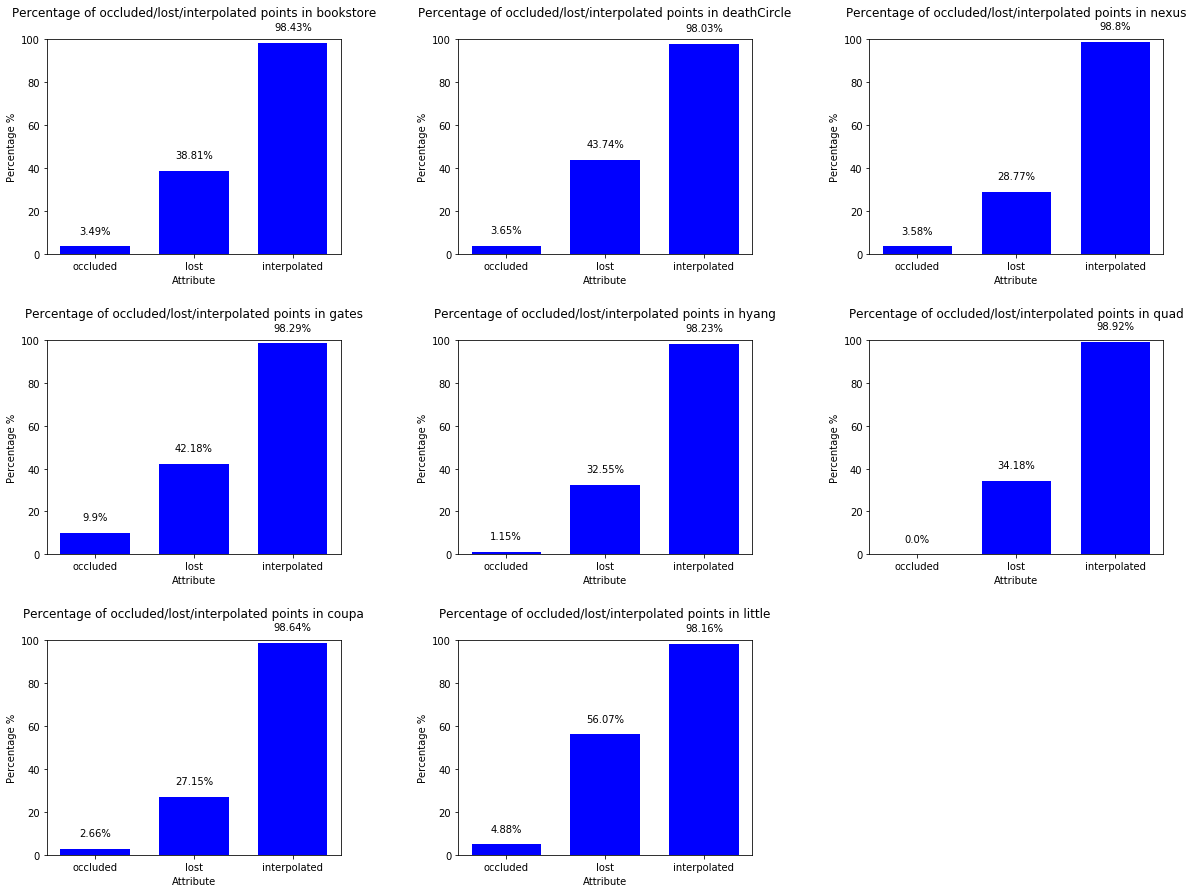

In [36]:
fig = plt.figure(figsize=(20,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, scene in enumerate(scenes):
    percentage_values = []
    
    for attribute_idx, attribute in enumerate(["occluded", "lost", "interpolated"]):
        scene_attribute_count = scenes_annotations_dataframe[(scenes_annotations_dataframe["scene_name"] == scene) & 
                                                           (scenes_annotations_dataframe[attribute] == 1.0)].shape[0]
        scene_count = scenes_annotations_dataframe[scenes_annotations_dataframe['scene_name'] == scene].shape[0]
        
        attribute_percentage = (scene_attribute_count / scene_count)*100.0
        percentage_values.append(attribute_percentage)
    
    ax = fig.add_subplot(3, 3, i+1)
    bar1 = ax.bar(range(len(percentage_values)), percentage_values, 0.70, color="b", tick_label=["occluded", "lost", "interpolated"])
    ax.set_ylabel("Percentage %")
    ax.set_xlabel('Attribute')
    ax.set_title('Percentage of occluded/lost/interpolated points in ' + scene, y=1.08)
    # Set a clean upper y-axis limit.
    ax.set_ylim(ymax=100)
    
    rects = ax.patches
    for rect, label in zip(rects, percentage_values):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + 5, str(round(label,2)) + "%", ha='center', va='bottom')